Import Libraries

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.linear_model import SGDClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Loading the pickled data

In [2]:
#getting the data 
# importing pickled data 
sup_df=pd.read_pickle('Pickledfiles/cl_fs_imdb_df.pkl') 
#sup_df=sup_df[['feature_selected','label']] # cleaned and feature selected reviews 
#sup_df.shape 



In [3]:
sup_df.head()

,review,label
0,bromwel high cartoon comedi ran time program s...,pos
1,homeless or houseless georg carlin state issu ...,pos
2,brilliant over act lesley ann warren best dram...,pos
3,easili underr film inn brook cannon sure flaw ...,pos
4,typic mel brook film much le slapstick movi ac...,pos


In [4]:
sup_df.shape

(50000, 2)

In [5]:
#getting the training data 
# importing pickled data 
train_df=pd.read_pickle('Pickledfiles/cl_train_df.pkl') 
 


In [6]:
train_df.shape

(25000, 2)

In [7]:
#getting the test data 
# importing pickled data 
test_df=pd.read_pickle('Pickledfiles/cl_test_df.pkl') 
 

In [8]:
test_df.shape

(25000, 2)

Function to split the text / review

In [9]:
#since we are using cleaned data, only splitting is required.

def review_split(text):
    import string
    return text.split() 

In [10]:
# Prepare the data

In [11]:
# preparing data
x = sup_df.review
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(sup_df.label)

In [12]:
# preparing training data
x_train = train_df.review
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(train_df.label)

In [13]:
# preparing testing data
x_test = test_df.review
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_test = le.fit_transform(test_df.label)

In [14]:
# Total number of unique words
print("Number of unique words in consolidated dataset: ")
print(len(np.unique(np.hstack(x))))
print("Number of unique words in Training dataset: ")
print(len(np.unique(np.hstack(x_train))))
print("Number of unique words in Testing dataset: ")
print(len(np.unique(np.hstack(x_test))))

Number of unique words in consolidated dataset: 
49576
Number of unique words in Training dataset: 
24898
Number of unique words in Testing dataset: 
24795


Assigning Train and Text variables

In [15]:
msg_train = x_train
msg_test = x_test
label_train = y_train
label_test = y_test

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

25000 25000 50000


# ML Classifiers to be tested
1) Naive Bayes Classifier

2) Decision Trees

3) Random Forest

4) Logistic Regression

5) SGD Classifier

6) ADA Boost 

# Creating Pipeline

Pipeline is a utility that provides a way to automate a machine learning workflow. It works by allowing several transformers to be chained together. One can also add an estimator at the end of the pipeline. Data flows from the start of the pipeline to its end, and each time it is transformed and fed to the next component. A Pipeline object has two main methods:

fit_transform: this same method is called for each transformer and each time the result is fed into the next transformer;
fit_predict: if your pipeline ends with an estimator, then as before the data is transformed until it arrives at the last step, where it is fed into the estimator and fit_predict is called on the estimator.

# Multinomial NB

In [16]:
# Multinomial NB
pipelineNB = Pipeline([
    ('bow', CountVectorizer(analyzer=review_split)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
start_time = time.time()
pipelineNB.fit(msg_train,label_train)
cal_time1 = (time.time()- start_time)

predictionsNB = pipelineNB.predict(msg_test)
print(classification_report(predictionsNB,label_test),'time taken:',cal_time1)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12705
           1       0.84      0.86      0.85     12295

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000
 time taken: 1.1174187660217285


In [17]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(label_test, predictionsNB)
accuracy1

0.84996

# DecisionTreeClassifier

In [18]:
#DecisionTreeClassifier
pipelineDT = Pipeline([
    ('bow', CountVectorizer(analyzer=review_split)),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  DecisionTreeClassifier()),  
])
start_time = time.time()
pipelineDT.fit(msg_train,label_train)
cal_time2 = (time.time()- start_time)
predictionsDT = pipelineDT.predict(msg_test)

print(classification_report(predictionsDT,label_test),'time taken:',cal_time2)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     12590
           1       0.71      0.72      0.72     12410

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.72      0.72      0.72     25000
 time taken: 16.32056474685669


In [19]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(label_test, predictionsDT)
accuracy2

0.7176

# RandomForestClassifier

In [20]:
pipelineRF = Pipeline([
    ('bow', CountVectorizer(analyzer=review_split)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  RandomForestClassifier()),
]) 
start_time = time.time()
pipelineRF.fit(msg_train,label_train)
cal_time3 = (time.time()- start_time)
predictionsRF = pipelineRF.predict(msg_test)

print(classification_report(predictionsRF,label_test),'time taken:',cal_time3)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     12704
           1       0.84      0.85      0.84     12296

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000
 time taken: 45.48243737220764


In [22]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(label_test, predictionsRF)
accuracy3

0.84336

# Logistic Regression

In [23]:
pipelineLR = Pipeline([
    ('bow', CountVectorizer(analyzer=review_split)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  LogisticRegression()), 
])
start_time = time.time()

pipelineLR.fit(msg_train,label_train)
cal_time4 = (time.time()- start_time)
predictionsLR = pipelineLR.predict(msg_test)

print(classification_report(predictionsLR,label_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     12369
           1       0.89      0.88      0.88     12631

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [24]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(label_test, predictionsLR)
accuracy4

0.88196

# SGD Classifier

In [25]:
pipelineSGD = Pipeline([
    ('bow', CountVectorizer(analyzer=review_split)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  SGDClassifier()),  # train on TF-IDF vectors w/  DecisionTreeClassifier
])
start_time = time.time()

pipelineSGD.fit(msg_train,label_train)
cal_time5 = (time.time()- start_time)
predictionsSGD = pipelineSGD.predict(msg_test)

print(classification_report(predictionsSGD,label_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12270
           1       0.89      0.87      0.88     12730

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [26]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy5 = accuracy_score(label_test, predictionsSGD)
accuracy5

0.88112

# ADABoost Classifier

In [27]:
pipelineADA = Pipeline([
    ('bow', CountVectorizer(analyzer=review_split)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  AdaBoostClassifier()),
]) 
start_time = time.time()
pipelineADA.fit(msg_train,label_train)
cal_time6 = (time.time()- start_time)
predictionsADA = pipelineADA.predict(msg_test)

print(classification_report(predictionsADA,label_test),'time taken:',cal_time6)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     11661
           1       0.84      0.79      0.82     13339

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000
 time taken: 11.247740268707275


In [28]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy6 = accuracy_score(label_test, predictionsADA)
accuracy6

0.81092

In [31]:
alist = [('naive bayes',round(accuracy1,2),cal_time1),
          ('DecisionTreeClassifier',round(accuracy2,2),cal_time2),
          ('Random Forest',round(accuracy3,2),cal_time3),
         ('Logistic Regression',round(accuracy4,2),cal_time4),
         ('SGD Classifier',round(accuracy5,2),cal_time5),
          ('ADA Boost',round(accuracy6,2),cal_time5)]
                    
    
results = pd.DataFrame(np.array(alist),columns=['model','accuracy','time'])
results

,model,accuracy,time
0,naive bayes,0.85,1.1174187660217285
1,DecisionTreeClassifier,0.72,16.32056474685669
2,Random Forest,0.84,45.48243737220764
3,Logistic Regression,0.88,1.3339083194732666
4,SGD Classifier,0.88,1.1444263458251953
5,ADA Boost,0.81,1.1444263458251953


Function to capture the different scores

In [32]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)
    

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

***************
* Naive Bayes *
***************
Accuracy : 0.8500 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8558 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8418 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8500                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


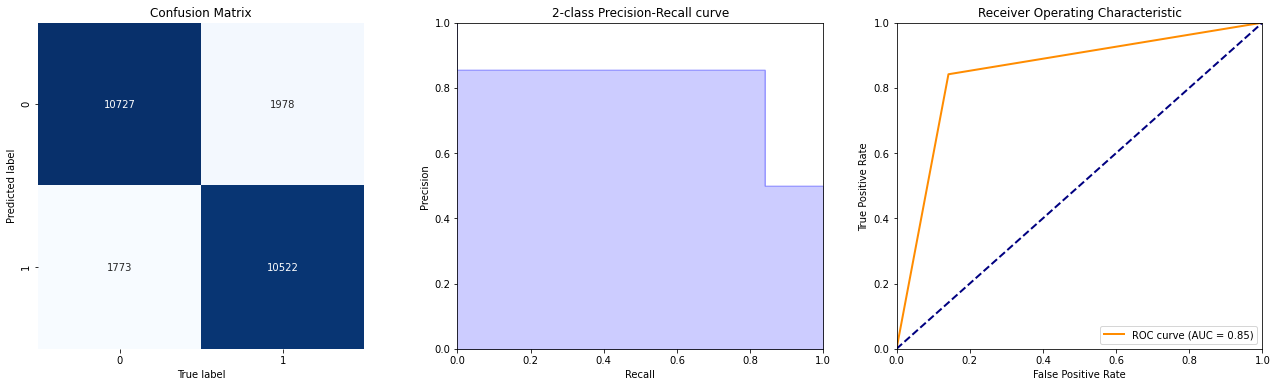


*****************
* Decision Tree *
*****************
Accuracy : 0.7176 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7192 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7140 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7176                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


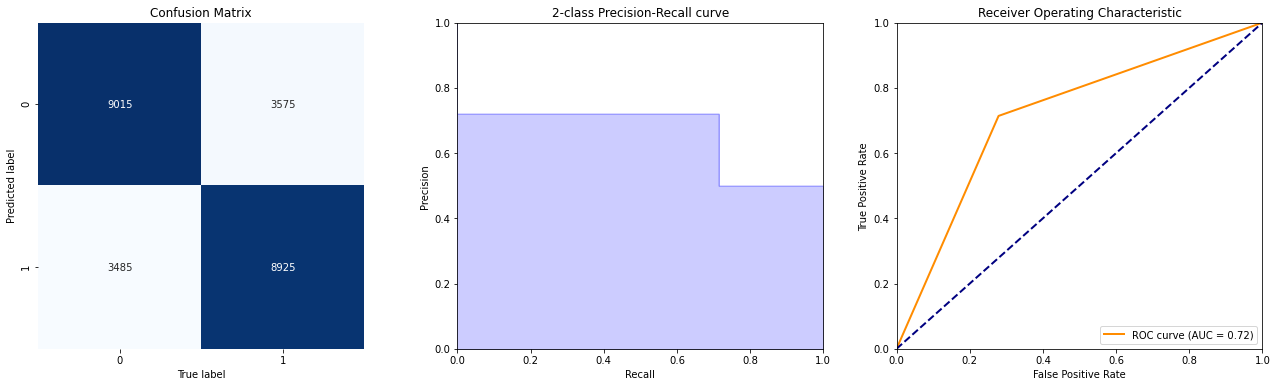


*****************
* Random Forest *
*****************
Accuracy : 0.8434 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8491 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8352 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8434                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


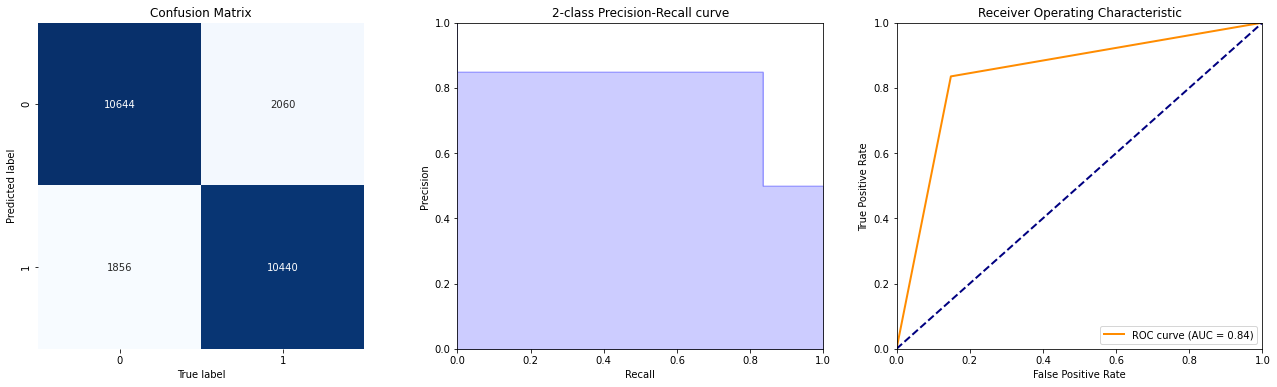


***********************
* Logistic Regression *
***********************
Accuracy : 0.8820 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8780 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8872 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8820                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


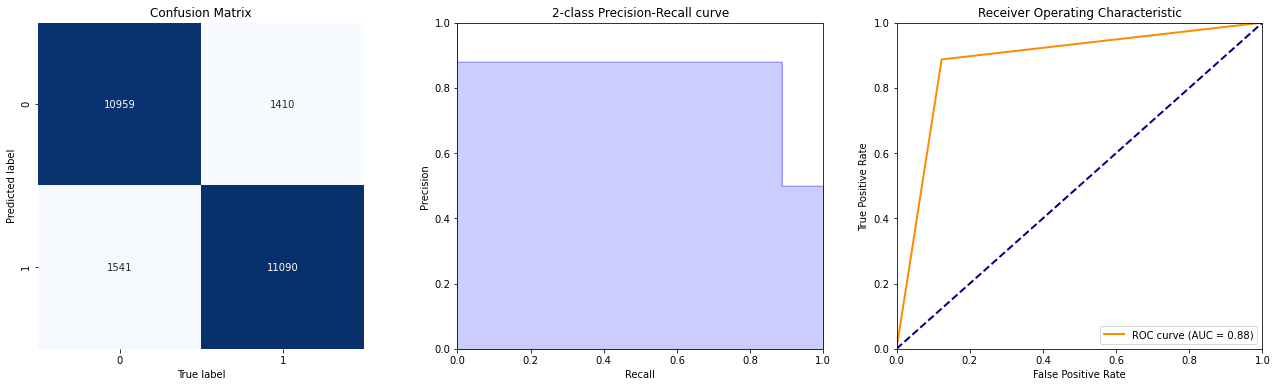


******************
* SGD Classifier *
******************
Accuracy : 0.8811 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8742 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8903 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8811                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


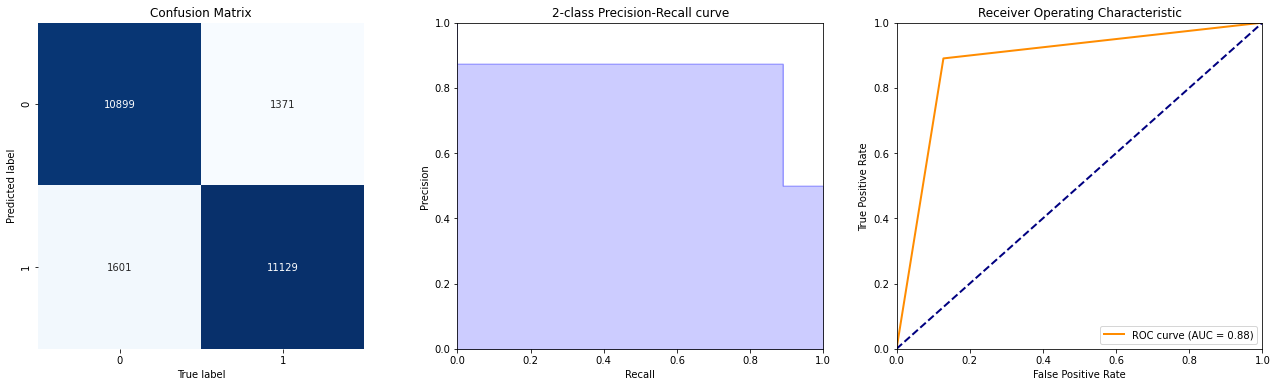


************
* ADABoost *
************
Accuracy : 0.8109 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7914 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8445 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8109                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


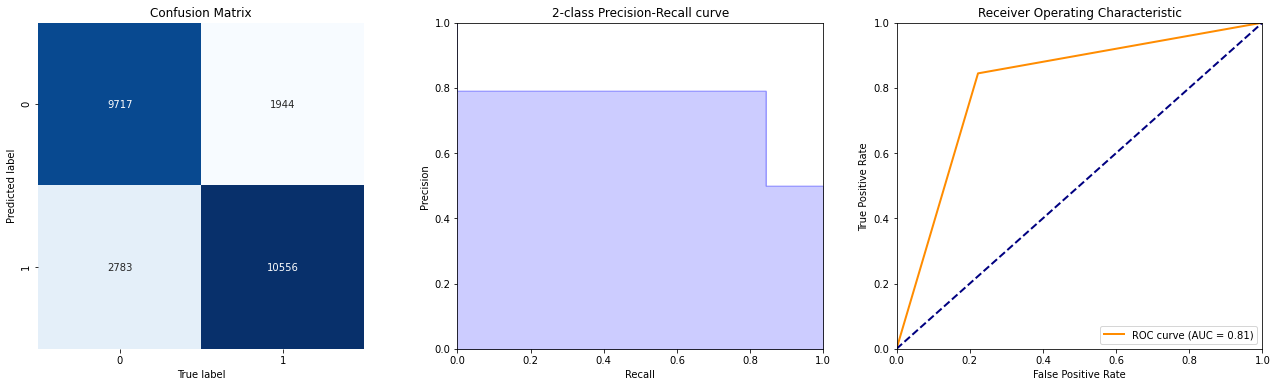

In [33]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression','SGD Classifier','ADABoost']
for i, m in enumerate([pipelineNB,pipelineDT,pipelineRF,pipelineLR,pipelineSGD,pipelineADA]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(msg_test)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(label_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()
    

In [34]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Naive Bayes,0.84996,0.855795,0.84176,0.84996
1,Decision Tree,0.71760,0.719178,0.71400,0.71760
2,Random Forest,0.84336,0.849057,0.83520,0.84336
3,Logistic Regression,0.88196,0.877999,0.88720,0.88196
4,SGD Classifier,0.88112,0.874234,0.89032,0.88112
5,ADABoost,0.81092,0.791364,0.84448,0.81092


# Test  couple of Reviews

In [36]:
pos = ["I've seen this story before but my kids haven't. Boy with troubled past joins military, faces his past, falls in love and becomes a man. "
       "The mentor this time is played perfectly by Kevin Costner; An ordinary man with common everyday problems who lives an extraordinary "
       "conviction, to save lives. After losing his team he takes a teaching position training the next generation of heroes. The young troubled "
       "recruit is played by Kutcher. While his scenes with the local love interest are a tad stiff and don't generate enough heat to melt butter, "
       "he compliments Costner well. I never really understood Sela Ward as the neglected wife and felt she should of wanted Costner to quit out of "
       "concern for his safety as opposed to her selfish needs. But her presence on screen is a pleasure. The two unaccredited stars of this movie "
       "are the Coast Guard and the Sea. Both powerful forces which should not be taken for granted in real life or this movie. The movie has some "
       "slow spots and could have used the wasted 15 minutes to strengthen the character relationships. But it still works. The rescue scenes are "
       "intense and well filmed and edited to provide maximum impact. This movie earns the audience applause. And the applause of my two sons."]

print("Pos prediction: {}". format(pipelineLR.predict((pos))))

Pos prediction: [1]


In [37]:
neg = ["David Bryce\'s comments nearby are exceptionally well written and informative as almost say everything "
       "I feel about DARLING LILI. This massive musical is so peculiar and over blown, over produced and must have "
       "caused ruptures at Paramount in 1970. It cost 22 million dollars! That is simply irresponsible. DARLING LILI "
       "must have been greenlit from a board meeting that said \"hey we got that Pink Panther guy and that Sound Of Music gal... "
       "lets get this too\" and handed over a blank cheque. The result is a hybrid of GIGI, ZEPPELIN, HALF A SIXPENCE, some MGM 40s "
       "song and dance numbers of a style (daisies and boaters!) so hopelessly old fashioned as to be like musical porridge, and MATA HARI "
       "dramatics. The production is colossal, lush, breathtaking to view, but the rest: the ridiculous romance, Julie looking befuddled, Hudson "
       "already dead, the mistimed comedy, and the astoundingly boring songs deaden this spectacular film into being irritating. LILI is"
       " like a twee 1940s mega musical with some vulgar bits to spice it up. STAR! released the year before sadly crashed and now is being "
       "finally appreciated for the excellent film is genuinely is... and Andrews looks sublime, mature, especially in the last half hour......"
       "but LILI is POPPINS and DOLLY frilly and I believe really killed off the mega musical binge of the 60s..... "
       "and made Andrews look like Poppins again... which I believe was not Edwards intention. Paramount must have collectively fainted "
       "when they saw this: and with another $20 million festering in CATCH 22, and $12 million in ON A CLEAR DAY and $25 million in PAINT YOUR WAGON...."
       "they had a financial abyss of CLEOPATRA proportions with $77 million tied into 4 films with very uncertain futures. Maybe they should have asked seer "
       "Daisy Gamble from ON A CLEAR DAY ......LILI was very popular on immediate first release in Australia and ran in 70mm cinemas for months but it failed "
       "once out in the subs and the sticks and only ever surfaced after that on one night stands with ON A CLEAR DAY as a Sunday night double. Thank "
       "god Paramount had their simple $1million (yes, ONE MILLION DOLLAR) film LOVE STORY and that $4 million dollar gangster pic THE GODFATHER "
       "also ready to recover all the $77 million in just the next two years....for just $5m.... incredible!"]

print("Neg prediction: {}". format(pipelineLR.predict((neg))))

Neg prediction: [0]


# As you can see the above 2 reviews have been classified correctly 

In [ ]:
## End of Part 2 ##